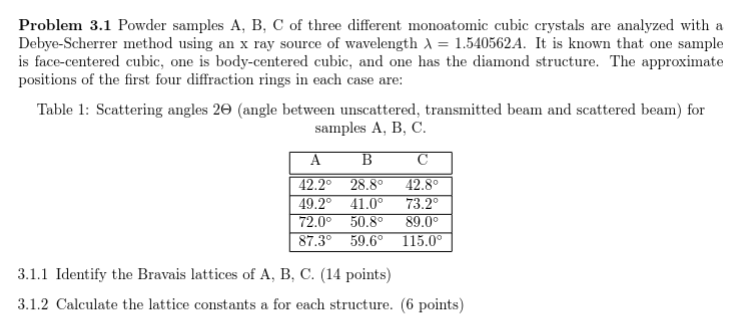

FCC, BCC, and Diamond have specific possible values for $h^2 + k^2 + l^2$.

FCC: 2, 4, 6, 8<br>
BCC: 3, 4, 8, 11<br>
Diamond: idk we'll use process of elimination

Since we have a constant distance $d$ with monoatomic crystals,

$$
d = \frac{a}{\sqrt{h^2+k^2+l^2}}\\
$$
We can use bragg's law
$$
n\lambda = 2 d \sin (\theta) \\
n\lambda = 2 \frac{a}{\sqrt{h^2+k^2+l^2}} \sin (\theta) \\
n\lambda \sqrt{h^2+k^2+l^2}= 2 a \sin (\theta) \\

\sin \theta \sim \sqrt{h^2+k^2+l^2} \\
\sin^2 \theta \sim h^2+k^2+l^2 \\

$$
Hoping $n$ isn't an issue

Lets convert our angles to $\sin^2\theta$

In [23]:
from numpy import sin, pi, array

def degree_to_rad(angles):
    return [theta * 2 * pi / 360 for theta in angles] 


A_angles = degree_to_rad(array([42.2, 49.2, 72.0, 87.3])/2) #to convert from 2theta to theta
B_angles = degree_to_rad(array([28.8, 41.0, 50.8, 59.6])/2)
C_angles = degree_to_rad(array([42.8, 73.2, 89.0, 115.0])/2)


a_vals = sin(A_angles)**2
b_vals = sin(B_angles)**2
c_vals = sin(C_angles)**2

print(a_vals/a_vals.min()*3) # BCC
print(b_vals/b_vals.min()*2) # FCC
print(c_vals/c_vals.min()*3) # Diamond -> 3, 8, 11, 16?


[ 3.          4.01140673  7.99763031 11.0290561 ]
[2.         3.96610617 5.94972627 7.98695089]
[ 3.          8.01030354 11.07012161 16.02828938]


For the final step, I simpy did guess and check until it looked about right. So we have our bravais lattices

A: BCC<br>
B: FCC<br>
C: Diamond<br>

Part 2: Lattic constants

Finding $d$ and $a$ go hand-in-hand. Let's see if we can find $d$, again using a little bit of guess-and-check

$$
\frac{\lambda}{2\sin\theta} = \frac{d}{n}
$$

Let's get our $d/n$ values, and check if they're all scalar multiples of each other to find scalar $n$, and then $d$

$$
\frac{d}{n} * \frac{n_1}{d} = \frac{n_1}{n} \rightarrow \text{rational}
$$

In [41]:
wavelen = 1.540562
A_d_over_n = wavelen/(2*sin(A_angles))
B_d_over_n = wavelen/(2*sin(B_angles))
C_d_over_n = wavelen/(2*sin(C_angles))

print(A_d_over_n/A_d_over_n.min())
print(B_d_over_n/B_d_over_n.min())
print(C_d_over_n/C_d_over_n.min())

[1.91738156 1.65813858 1.17432555 1.        ]
[1.9983682  1.41908477 1.15862265 1.        ]
[2.31144179 1.4145526  1.20328192 1.        ]


That did not work. Let's see...

My peers assumed that n=1, and said that $d$ is not constant, only $a$ is. Let's try again

$$
\frac{\lambda}{2\sin\theta} = \frac{a}{\sqrt{h^2+k^2+l^2}}
$$

Each angle corresponds to those hkl sums, so let's square everything

$$
\frac{\lambda^2}{4\sin^2\theta} = \frac{a^2}{h^2+k^2+l^2}

$$

In [55]:
A = wavelen**2/(4*sin(A_angles)**2)
B = wavelen**2/(4*sin(B_angles)**2)
C = wavelen**2/(4*sin(C_angles)**2)

A_hkl = array([3, 4, 8, 11])
B_hkl = array([2, 4, 6, 8])
C_hkl = array([3, 8, 11, 16]) # nice callback

print(A*A_hkl)
print(B*B_hkl)
print(C*C_hkl)

[13.73479955 13.69574362 13.73886916 13.69861516]
[19.18722269 19.35119421 19.34935004 19.21857085]
[13.36986931 13.35267184 13.28518038 13.34627195]


There we go! From the above, we can approximate each lattice constant

$$
a_A = 13.7 \r{A}\\
a_B = 19.2 \r{A}\\
a_C = 13.3 \r{A}
$$